Useful links
- [Comparing random forests and the multi-output meta estimator](http://scikit-learn.org/stable/auto_examples/ensemble/plot_random_forest_regression_multioutput.html#sphx-glr-auto-examples-ensemble-plot-random-forest-regression-multioutput-py)
- [sklearn.ensemble.RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- [classifier comparison](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)


# Random Forest Regressor "lock and load"


In [1]:
# Author: Rinat R. Ismagilov <ismagil@polly.phys.msu.ru>
#
# License: GNU General Public License v3.0

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import time 
%matplotlib inline

pd.options.display.max_rows = 10
# pd.options.display.float_format = '{:.1f}'.format


In [2]:
# nice practice

%load_ext version_information

%version_information numpy, pandas, matplotlib, sklearn, version_information


Software versions
Python 3.5.2 64bit [MSC v.1900 64 bit (AMD64)]
IPython 5.1.0
OS Windows 10 10.0.17134 SP0
numpy 1.15.2
pandas 0.23.4
matplotlib 1.5.3
sklearn 0.20.0
version_information 1.0.3
Wed Nov 28 14:02:02 2018 Russia TZ 2 Standard Time

## Macro-tuning parameters
Including spectra path

In [3]:
# I run program at home and at the university
MSU_PC = False
if MSU_PC: 
    diskG = "D:/ZverG/"
else:
    diskG = "G:/"
    
my_rf_path = diskG + "SWAN BAND big data/random_forest_models/"
# my_file = "forest40chMOSTandNoise3add_estim" + str(my_estimators) + "_dep" + str(max_depth) + "T{:0.0f}".format(time.time())
my_file = "forest40chMOSTandNoise3add_estim50_dep50T1540915567"
  

## Load model and test (the @anchor from rnd_forest40ch_clean_and_3noise.ipynb)

In [4]:
import _pickle
with open(my_rf_path+my_file, 'rb') as f:
    rf = _pickle.load(f)

# print(rf.predict(exp_oes_sample))


In [5]:
load_tb = pd.read_csv(diskG + "SWAN BAND big data/kud/xy_spectra/" + "spec_scan_26_11_2018__13-06-07_clear.txt", delimiter= " ", skiprows = 2, header=None, dtype = np.str)

In [6]:
load_tb

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
0,0,0,194.17,194.44,194.71,194.98,195.25,195.52,195.79,196.06,...,1116.03,1116.27,1116.50,1116.74,1116.98,1117.21,1117.45,1117.69,1117.92,1118.16
1,0,0,-13.50,-18.85,-48.00,-22.75,-18.15,-8.25,8.60,5.45,...,38.75,11.55,17.55,32.65,16.40,0.60,18.70,51.80,21.85,12.70
2,0,1,-18.57,-13.92,-45.07,-6.82,-38.22,-13.32,2.53,-10.62,...,28.68,8.48,16.48,36.58,10.33,-18.47,14.63,48.73,34.78,13.63
3,0,2,14.58,-46.77,-15.92,-21.67,-9.07,6.83,6.68,-10.47,...,19.83,-9.37,19.63,61.73,37.48,-0.32,18.78,38.88,10.93,21.78
4,0,3,5.04,-38.31,-21.46,-10.21,-18.61,-2.71,10.14,8.99,...,14.29,14.09,10.09,17.19,16.94,-12.86,-19.76,25.34,21.39,-10.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5332,45,111,-3.65,-35.00,-8.15,-38.90,-26.30,2.60,22.45,-2.70,...,24.60,10.40,17.40,28.50,34.25,-10.55,15.55,74.65,9.70,-2.45
5333,45,112,6.81,1.46,-56.69,-28.44,-24.84,14.06,18.91,-9.24,...,20.06,6.86,22.86,58.96,36.71,-3.09,17.01,51.11,18.16,2.01
5334,45,113,13.20,-28.15,-5.30,-36.05,-33.45,-16.55,4.30,1.15,...,12.45,-1.75,14.25,44.35,20.10,13.30,20.40,53.50,2.55,-19.60
5335,45,114,4.74,-33.61,-17.76,-41.51,-23.91,-1.01,-5.16,-9.31,...,18.99,11.79,48.79,36.89,48.64,-4.16,11.94,57.04,14.09,-4.06


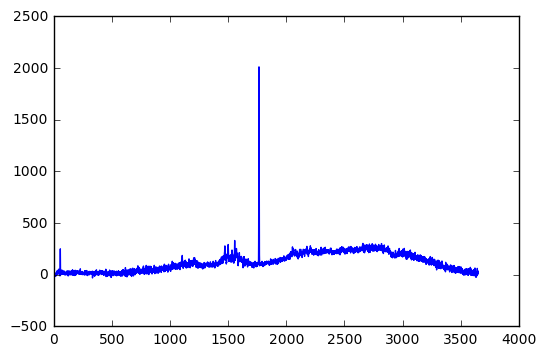

In [7]:
plt.plot(load_tb.iloc[3,2:])

In [8]:
# to move X,Y to the end see https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns
load_tb.iloc[:1,2:].values


array([['194.17', '194.44', '194.71', ..., '1117.69', '1117.92',
        '1118.16']], dtype=object)

In [9]:
#if work_level < 5:

wl = np.array(load_tb.iloc[:1,2:].values,dtype='float64')
wl = wl*10
intens = np.array(load_tb.iloc[1:,2:].values,dtype='float64')
coord = np.array(load_tb.iloc[1:,:2].values,dtype='float64')
wl, intens, coord

(array([[ 1941.7,  1944.4,  1947.1, ..., 11176.9, 11179.2, 11181.6]]),
 array([[-13.5 , -18.85, -48.  , ...,  51.8 ,  21.85,  12.7 ],
        [-18.57, -13.92, -45.07, ...,  48.73,  34.78,  13.63],
        [ 14.58, -46.77, -15.92, ...,  38.88,  10.93,  21.78],
        ...,
        [ 13.2 , -28.15,  -5.3 , ...,  53.5 ,   2.55, -19.6 ],
        [  4.74, -33.61, -17.76, ...,  57.04,  14.09,  -4.06],
        [ -9.8 , -37.15, -15.3 , ...,  81.5 ,  35.55,  -7.6 ]]),
 array([[  0.,   0.],
        [  0.,   1.],
        [  0.,   2.],
        ...,
        [ 45., 113.],
        [ 45., 114.],
        [ 45., 115.]]))

In [10]:
# if work_level <4:
        # 1 masking - working only with Swan Band (0,0)
mask = (wl > 5033.) & (wl < 5220.)
n_rows = intens.shape[0]
mask2D = np.tile(mask, (n_rows,1))
# right boundary is a little bit bigger than for theoretical, because there might be huge shifts. Anyway it will be implicitly cut during standardization step; Left boundary empirically optimized
wl, intens = np.copy(wl[mask]), intens[mask2D].reshape(n_rows,-1).copy()
wl, intens
# wl.shape, intens.shape

(array([5033.2, 5035.8, 5038.4, 5041. , 5043.6, 5046.2, 5048.8, 5051.4,
        5053.9, 5056.5, 5059.1, 5061.7, 5064.3, 5066.9, 5069.5, 5072.1,
        5074.7, 5077.3, 5079.9, 5082.5, 5085.1, 5087.7, 5090.2, 5092.8,
        5095.4, 5098. , 5100.6, 5103.2, 5105.8, 5108.4, 5111. , 5113.6,
        5116.2, 5118.8, 5121.4, 5123.9, 5126.5, 5129.1, 5131.7, 5134.3,
        5136.9, 5139.5, 5142.1, 5144.7, 5147.3, 5149.8, 5152.4, 5155. ,
        5157.6, 5160.2, 5162.8, 5165.4, 5168. , 5170.6, 5173.2, 5175.7,
        5178.3, 5180.9, 5183.5, 5186.1, 5188.7, 5191.3, 5193.9, 5196.5,
        5199. , 5201.6, 5204.2, 5206.8, 5209.4, 5212. , 5214.6, 5217.2,
        5219.8]), array([[ 97.05,  93.9 ,  84.75, ...,  82.95,  80.15,  77.4 ],
        [ 75.98, 112.83,  86.68, ...,  61.88,  65.08,  69.33],
        [ 98.13, 108.98,  86.83, ..., 101.03,  67.23,  64.48],
        ...,
        [ 80.75, 113.6 ,  89.45, ...,  80.65,  65.85,  74.1 ],
        [ 77.29,  91.14,  79.99, ...,  83.19,  59.39,  74.64],
       

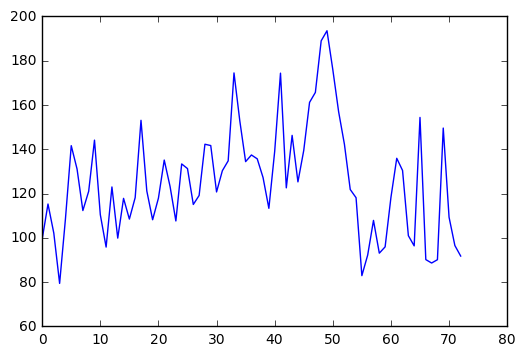

In [12]:
wl.shape, intens.shape

plt.plot(intens[5])

In [13]:
import sys
sys.path.append("..")

from utils.pyOESconsts import Consts
from utils.SpectrumModifier import SpectrumModifier

modifier = SpectrumModifier()

# if work_level <3:
# 2 deTrending - substract the line
for i in np.arange(n_rows):
    intens[i] = modifier.detrend_by_line_from_2left_right_minpoints(wl, intens[i])

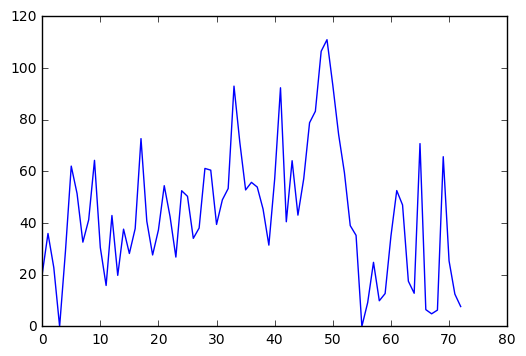

In [14]:
plt.plot(intens[5])

In [15]:
# if work_level <2:
        # 3 standardizing - make x grid similar to all spectra (includes interpolation to increase/decrease the number of X,Y points)
       
intens_std = np.zeros((n_rows,50), dtype='float64')
for i in np.arange(n_rows):
    wl_blind, intens_std[i] = modifier.make_standard_xgrid_spectrum(wl, intens[i])
            # 4 translation maximum - align to theoretical  5165.2A
        
    intens_std[i] = modifier.translate_OY_along_x_to_merge_lines(wl_blind, intens_std[i], expected_max=5165.2, max_region=200.,line=Consts.C2_SWAN_BAND['vibr trans (0,0)'])

            # 5 normilize - devide by max C2 intensity
    intens_std[i] = modifier.normalize_by_division_with_max_intensity(wl_blind, intens_std[i])
wl = wl_blind
intens = intens_std
wl, intens

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


(array([5036.        , 5039.34693878, 5042.69387755, 5046.04081633,
        5049.3877551 , 5052.73469388, 5056.08163265, 5059.42857143,
        5062.7755102 , 5066.12244898, 5069.46938776, 5072.81632653,
        5076.16326531, 5079.51020408, 5082.85714286, 5086.20408163,
        5089.55102041, 5092.89795918, 5096.24489796, 5099.59183673,
        5102.93877551, 5106.28571429, 5109.63265306, 5112.97959184,
        5116.32653061, 5119.67346939, 5123.02040816, 5126.36734694,
        5129.71428571, 5133.06122449, 5136.40816327, 5139.75510204,
        5143.10204082, 5146.44897959, 5149.79591837, 5153.14285714,
        5156.48979592, 5159.83673469, 5163.18367347, 5166.53061224,
        5169.87755102, 5173.2244898 , 5176.57142857, 5179.91836735,
        5183.26530612, 5186.6122449 , 5189.95918367, 5193.30612245,
        5196.65306122, 5200.        ]),
 array([[        nan,         nan,  0.08891362, ...,  0.02950835,
          0.51908968,  0.32280389],
        [        nan,         nan,  0.4426

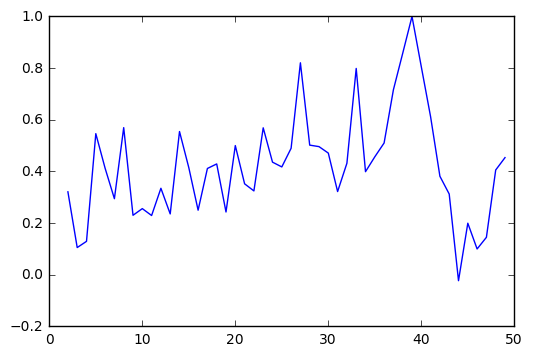

In [16]:
plt.plot(intens[5])

In [17]:
def msu_data_preprocessing(my_file_path = diskG + "SWAN BAND big data/kud/xy_spectra/" + "spec_scan_26_11_2018__13-06-07_clear.txt",
                           level = "deepest"):
    """
    Reads spectra file - table's 3d row - wavelength in nm, others intensity, first and second columns are coordinates (x,y).
    Preprocessed Intensity rows
            
    @param my_file_path: (string) file path with spectra, i.e. "spec_scan_26_11_2018__13-06-07_clear.txt"
    @param level: {deepest, deep, normal, nothing} level of processing

    @return (coord, wl, intens): (all np.array) 
                                    fetched coord - 2D matrix of scanned coordinates (x,y),
                                    preprocessed wl - array of wavelength in A,
                                    preprocessed intens - 2D matrix of intensity in Arb.
    """
    load_tb = pd.read_csv(my_file_path, delimiter= " ", skiprows = 2, header=None, dtype = np.str)
    
    levels = {"deepest":1, "deep":2, "normal":3, "nothing":4,}
    work_level = levels.get(level, "deepest")
    
    if work_level < 5:
        wl = np.array(load_tb.iloc[:1,2:].values,dtype='float64')
        wl = wl*10
        intens = np.array(load_tb.iloc[1:,2:].values,dtype='float64')
        coord = np.array(load_tb.iloc[1:,:2].values,dtype='float64')

        
    if work_level <4:
        # 1 masking - working only with Swan Band (0,0)
        mask = (wl > 5033.) & (wl < 5220.)
        n_rows = intens.shape[0]
        mask2D = np.tile(mask, (n_rows,1))
        # right boundary is a little bit bigger than for theoretical, because there might be huge shifts. Anyway it will be implicitly cut during standardization step; Left boundary empirically optimized
        wl, intens = np.copy(wl[mask]), intens[mask2D].reshape(n_rows,-1).copy()

    if work_level <3:
        # 2 deTrending - substract the line
        for i in np.arange(n_rows):
            intens[i] = modifier.detrend_by_line_from_2left_right_minpoints(wl, intens[i])
    
    if work_level <2:
        # 3 standardizing - make x grid similar to all spectra (includes interpolation to increase/decrease the number of X,Y points)
    
        intens_std = np.zeros((n_rows,50), dtype='float64')
        for i in np.arange(n_rows):
            wl_blind, intens_std[i] = modifier.make_standard_xgrid_spectrum(wl, intens[i])
            
            # 4 translation maximum - align to theoretical  5165.2A
            intens_std[i] = modifier.translate_OY_along_x_to_merge_lines(wl_blind, intens_std[i], expected_max=5165.2, max_region=200.,line=Consts.C2_SWAN_BAND['vibr trans (0,0)'])

            # 5 normilize - devide by max C2 intensity
            intens_std[i] = modifier.normalize_by_division_with_max_intensity(wl_blind, intens_std[i])
    wl = wl_blind
    intens = intens_std
        
    return coord, wl, intens

In [18]:
coord2, wl2, intens2 = msu_data_preprocessing()

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


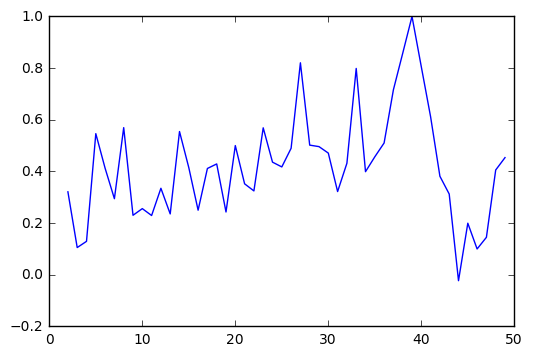

In [19]:
plt.plot(intens[5])

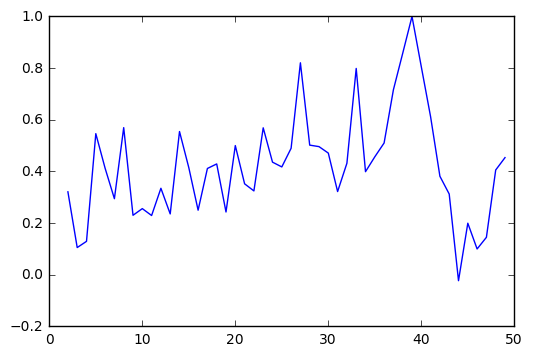

In [20]:
plt.plot(intens2[5])